In [20]:
import pandas as pd
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

In [21]:
if not os.path.isfile('train.csv'):
    !wget https://www.dropbox.com/s/wxz0qd1ngjb1z2d/train.csv

if not os.path.isfile('test.csv'):
    !wget https://www.dropbox.com/s/0kzeu3azlpfn2v3/test.csv

In [22]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [23]:
train.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)
test.drop(['HS_CPF', 'ORIENTACAO_SEXUAL', 'RELIGIAO'], axis = 1, inplace = True)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92106 entries, 0 to 92105
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TEMPOCPF                      92106 non-null  int64  
 1   DISTCENTROCIDADE              92106 non-null  int64  
 2   DISTZONARISCO                 92106 non-null  int64  
 3   QTDENDERECO                   92106 non-null  int64  
 4   QTDEMAIL                      92106 non-null  int64  
 5   QTDCELULAR                    92106 non-null  int64  
 6   CELULARPROCON                 92106 non-null  int64  
 7   QTDFONEFIXO                   92106 non-null  int64  
 8   TELFIXOPROCON                 92106 non-null  int64  
 9   INDICEEMPREGO                 92106 non-null  int64  
 10  PORTEEMPREGADOR               92106 non-null  int64  
 11  SOCIOEMPRESA                  92106 non-null  int64  
 12  FUNCIONARIOPUBLICO            92106 non-null  int64  
 13  S

In [25]:
train.describe()

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
count,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,...,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000,92106.000000
mean,-303.088561,884.902753,59206.046414,-130.970773,-131.996504,-131.384752,-132.331954,-130.904577,-132.323486,-130.852843,...,-131.288146,-130.779374,-131.620502,-132.106421,-132.330684,-132.294270,-8350.206881,-6527.310859,-9063.605389,0.095629
std,1758.159200,7232.965086,129605.133420,1142.836281,1142.716934,1142.788244,1142.677941,1142.844206,1142.678925,1142.851245,...,1142.800743,1142.861762,1142.762160,1142.704523,1142.678089,1142.682321,3710.038810,4761.246415,2910.970147,0.294083
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000
25%,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9998.000000,-9998.000000,-9998.000000,0.000000
50%,15.000000,1650.500000,980.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9998.000000,-9998.000000,-9998.000000,0.000000
75%,24.000000,4577.000000,48853.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,3.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-9998.000000,1.000000,-9998.000000,0.000000
max,27.000000,49716.000000,842292.000000,48.000000,8.000000,42.000000,1.000000,110.000000,1.000000,6.000000,...,9.000000,10.000000,10.000000,10.000000,1.000000,1.000000,18.000000,17.000000,23.000000,1.000000


In [26]:
train.head(5)

,TEMPOCPF,DISTCENTROCIDADE,DISTZONARISCO,QTDENDERECO,QTDEMAIL,QTDCELULAR,CELULARPROCON,QTDFONEFIXO,TELFIXOPROCON,INDICEEMPREGO,...,QTDDECLARACAOISENTA,QTDDECLARACAO10,QTDDECLARACAOREST10,QTDDECLARACAOPAGAR10,RESTITUICAOAGENCIAALTARENDA,BOLSAFAMILIA,ANOSULTIMARESTITUICAO,ANOSULTIMADECLARACAO,ANOSULTIMADECLARACAOPAGAR,TARGET
0,11,3338,166753,2,0,1,0,0,0,0,...,0,0,0,0,0,0,-9998,-9998,-9998,1.0
1,19,5792,4820,1,1,0,0,2,0,0,...,0,0,0,0,0,1,-9998,-9998,-9998,0.0
2,26,1550,502,1,0,2,0,1,0,4,...,4,2,0,0,0,0,-9998,4,-9998,0.0
3,18,0,535010,2,0,0,0,2,0,0,...,1,7,0,1,0,0,-9998,2,7,0.0
4,20,0,2528,3,0,1,0,3,0,6,...,0,0,0,0,0,0,-9998,15,15,0.0


In [27]:
# Transforma os valores -inf para NaN
train[train < 0] = np.nan

In [28]:
# Porcentagem de valores nulos nas colunas.
train.isna().sum() / len(train)

TEMPOCPF                        0.031833
DISTCENTROCIDADE                0.224383
DISTZONARISCO                   0.224383
QTDENDERECO                     0.013235
QTDEMAIL                        0.013235
QTDCELULAR                      0.013235
CELULARPROCON                   0.013235
QTDFONEFIXO                     0.013235
TELFIXOPROCON                   0.013235
INDICEEMPREGO                   0.013235
PORTEEMPREGADOR                 0.013235
SOCIOEMPRESA                    0.013235
FUNCIONARIOPUBLICO              0.013235
SEGMENTACAO                     0.013235
SEGMENTACAOCOBRANCA             0.013235
SEGMENTACAOECOM                 0.013235
SEGMENTACAOFIN                  0.013235
SEGMENTACAOTELECOM              0.013235
QTDPESSOASCASA                  0.620796
MENORRENDACASA                  0.620796
MAIORRENDACASA                  0.620796
SOMARENDACASA                   0.620796
MEDIARENDACASA                  0.620796
MAIORIDADECASA                  0.620904
MENORIDADECASA  

In [29]:
# Menor e maior valor de cada coluna / % de valores nulos / Correlação das colunas com o Target
target = train["TARGET"]

data = {
    "names":[],
    "min": [],
    "max": [],
    "%null": [],
    "correlation": [],
}
for (columnName, columnData) in train.iteritems():
    data['names'].append(columnName)
    values = list(filter(lambda a: not np.isnan(a) ,columnData))
    nanvalues = len(list(filter(np.isnan ,columnData)))
    data['min'].append(min(values) if len(values) > 0 else np.nan)
    data['max'].append(max(values) if len(values) > 0 else np.nan)
    data['%null'].append(nanvalues/len(columnData))
    data["correlation"].append(abs(round(train[columnName].corr(target)*100,2)))

infoColumns = pd.DataFrame.from_dict(data)

infoColumns.to_csv("infoColumns.csv", index = False)

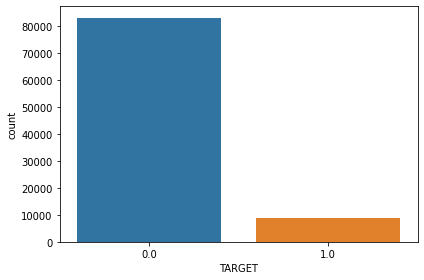

In [30]:
# gráfico de contagem do target no treino
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.countplot(x="TARGET", data=train)
plt.tight_layout()
plt.show()

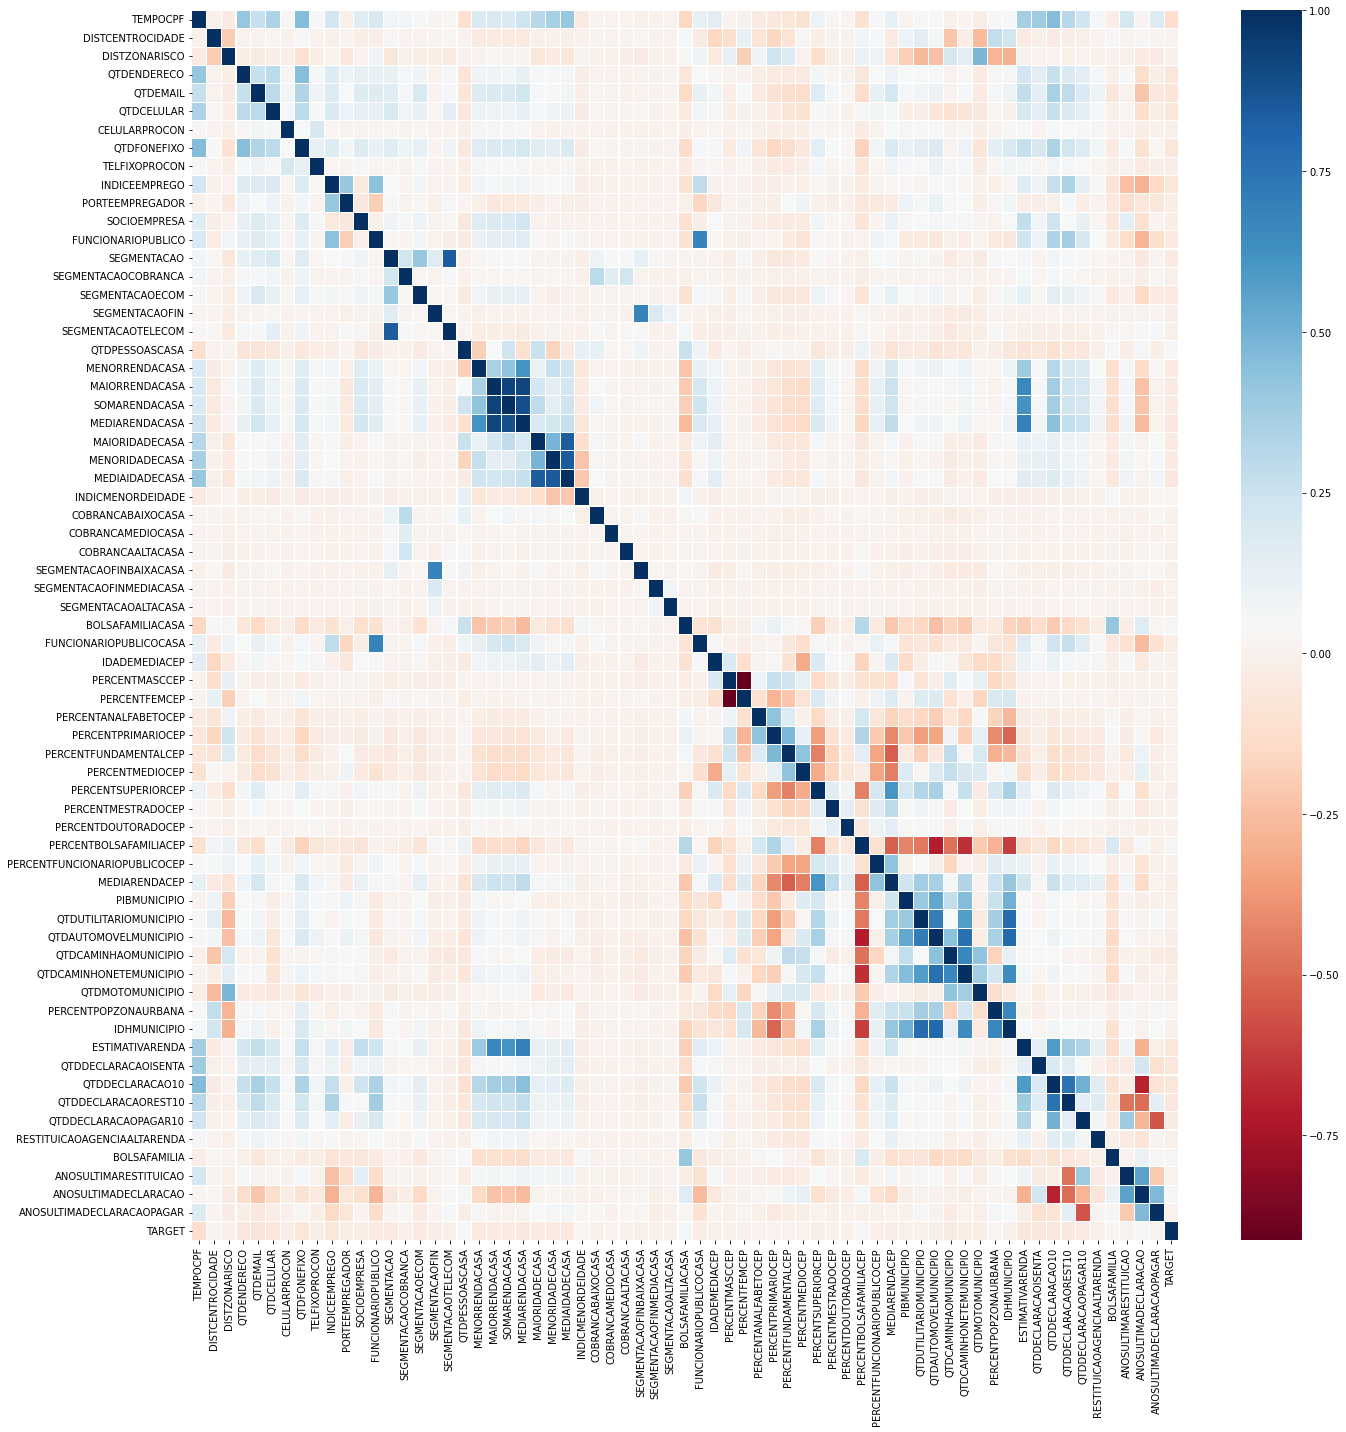

In [32]:
# ============= Análise de correlação =============
correlacao = train.corr()
fig, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(correlacao, xticklabels=correlacao.columns,
            yticklabels=correlacao.columns, linewidths=.1, cmap="RdBu", ax=ax)
plt.tight_layout()
plt.show()